### CatBoost

**CatBoost** (Categorical Boosting) is a gradient boosting algorithm that is particularly well-suited for handling categorical features. Developed by Yandex, CatBoost incorporates several innovations that make it highly efficient and effective for a wide range of machine learning tasks, including those with high cardinality categorical features.

#### Key Concepts

- **Handling Categorical Features**: CatBoost natively supports categorical features, converting them into numerical values in a way that preserves the information. This avoids the need for extensive preprocessing such as one-hot encoding.

### Comparison with XGBoost

#### Handling Categorical Data
- **XGBoost**: Requires preprocessing steps such as one-hot encoding or label encoding for categorical features.
- **CatBoost**: Natively supports categorical features, reducing preprocessing effort and preserving feature information.

#### Regularization and Overfitting
- **XGBoost**: Uses regularization techniques like L1 and L2 to prevent overfitting.
- **CatBoost**: Implements ordered boosting and other regularization techniques to minimize overfitting and prevent target leakage.

#### Training Speed
- **XGBoost**: Known for fast training with optimizations like parallel processing.
- **CatBoost**: Competitive training speed with efficient handling of categorical data, and support for both CPU and GPU training.


CatBoost simplifies the handling of categorical features and offers competitive performance, making it a valuable tool for machine learning practitioners.


Accuracy: 0.9825
Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.97      0.98        63
      benign       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Feature importances:
worst texture: 13.3554
worst concave points: 13.2412
worst area: 8.7381
worst perimeter: 6.5273
worst concavity: 6.3745
mean concave points: 6.3271
mean texture: 3.8905
worst radius: 3.3047
radius error: 3.2953
area error: 3.2341
worst smoothness: 3.0451
worst symmetry: 2.9871
mean concavity: 2.6518
compactness error: 2.5552
worst compactness: 2.4528
mean perimeter: 2.0270
mean radius: 1.8483
mean area: 1.7027
mean compactness: 1.5918
texture error: 1.4756
mean smoothness: 1.3082
mean symmetry: 1.1800
smoothness error: 1.1350
mean fractal dimension: 1.0934
symmetry error: 1.0648
worst fractal dimension: 0.9948
perimeter error: 0.8970
fractal dimension error: 0.7999
concave points error: 0.5360
concavity error: 0.3652


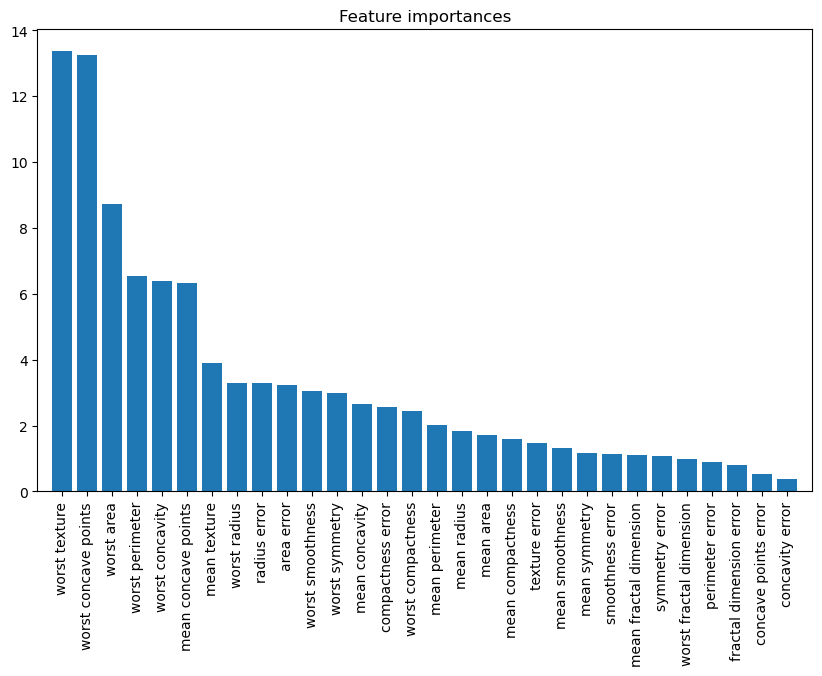

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Load the dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=breast_cancer.feature_names)
df['target'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = CatBoostClassifier(n_estimators=100, depth=5, random_state=42, verbose=0)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=breast_cancer.target_names)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

# Custom thresholds
thresholds = np.arange(0, 1.1, 0.1)

# Initialize lists for confusion matrix components
tps = []
fps = []
tns = []
fns = []

# Calculate true positives, false positives, true negatives, and false negatives for each threshold
for threshold in thresholds:
    temp_prediction = [1 if y >= threshold else 0 for y in y_pred_proba]
    tn, fp, fn, tp = confusion_matrix(y_test, temp_prediction).ravel()
    tps.append(tp)
    fps.append(fp)
    tns.append(tn)
    fns.append(fn)

# Create the dataframe with thresholds, true positives, false positives, true negatives, and false negatives
df_confusion_matrix = pd.DataFrame({'Thresholds': thresholds, 
                                    'TruePositive': tps, 'FalsePositive': fps,
                                    'TrueNegative': tns, 'FalseNegative': fns})

# Calculate recall, precision, F1 score, and false positive ratio
df_confusion_matrix["recall"] = df_confusion_matrix["TruePositive"] / (df_confusion_matrix["TruePositive"] + df_confusion_matrix["FalseNegative"])
df_confusion_matrix["precision"] = df_confusion_matrix["TruePositive"] / (df_confusion_matrix["TruePositive"] + df_confusion_matrix["FalsePositive"])
df_confusion_matrix["f1_score"] = 2 * (df_confusion_matrix["precision"] * df_confusion_matrix["recall"]) / (df_confusion_matrix["precision"] + df_confusion_matrix["recall"])




In [2]:
df_confusion_matrix

,Thresholds,TruePositive,FalsePositive,TrueNegative,FalseNegative,recall,precision,f1_score
0,0.0,108,63,0,0,1.000000,0.631579,0.774194
1,0.1,108,7,56,0,1.000000,0.939130,0.968610
2,0.2,107,5,58,1,0.990741,0.955357,0.972727
3,0.3,107,5,58,1,0.990741,0.955357,0.972727
4,0.4,107,3,60,1,0.990741,0.972727,0.981651
5,0.5,107,2,61,1,0.990741,0.981651,0.986175
6,0.6,106,2,61,2,0.981481,0.981481,0.981481
7,0.7,104,2,61,4,0.962963,0.981132,0.971963
8,0.8,102,1,62,6,0.944444,0.990291,0.966825
9,0.9,99,1,62,9,0.916667,0.990000,0.951923


Feature importances:
worst texture: 13.3554
worst concave points: 13.2412
worst area: 8.7381
worst perimeter: 6.5273
worst concavity: 6.3745
mean concave points: 6.3271
mean texture: 3.8905
worst radius: 3.3047
radius error: 3.2953
area error: 3.2341
worst smoothness: 3.0451
worst symmetry: 2.9871
mean concavity: 2.6518
compactness error: 2.5552
worst compactness: 2.4528
mean perimeter: 2.0270
mean radius: 1.8483
mean area: 1.7027
mean compactness: 1.5918
texture error: 1.4756
mean smoothness: 1.3082
mean symmetry: 1.1800
smoothness error: 1.1350
mean fractal dimension: 1.0934
symmetry error: 1.0648
worst fractal dimension: 0.9948
perimeter error: 0.8970
fractal dimension error: 0.7999
concave points error: 0.5360
concavity error: 0.3652


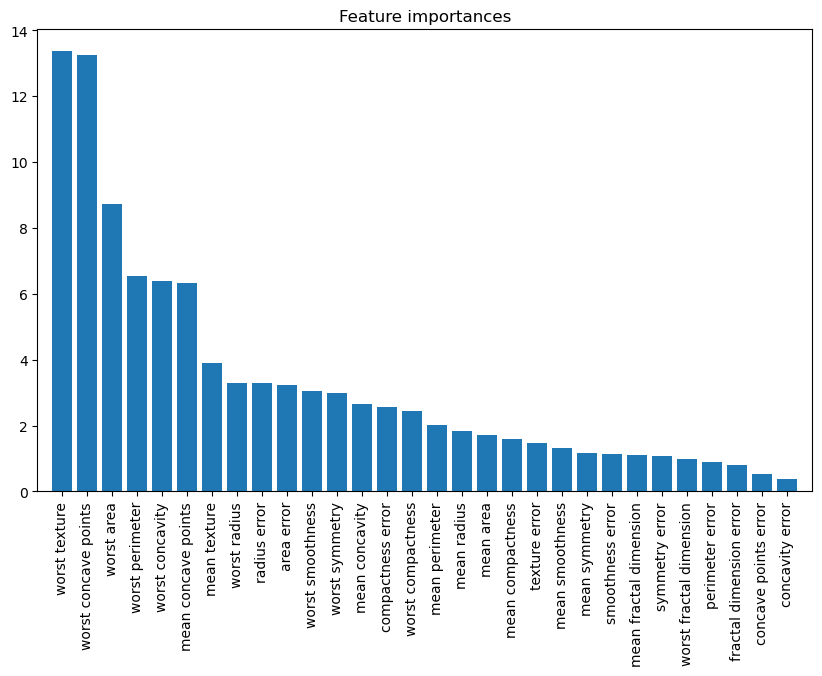

In [3]:
# Create a new figure for plotting
fig = go.Figure()

# Round the values in the df_confusion_matrix DataFrame to two decimal places
df_confusion_matrix_graph = df_confusion_matrix.round(3)

fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['recall'], mode='lines+markers', name='Recall'))
fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['precision'], mode='lines+markers', name='Precision'))
fig.add_trace(go.Scatter(x=df_confusion_matrix_graph['Thresholds'], y=df_confusion_matrix_graph['f1_score'], mode='lines+markers', name='F1 Score'))
fig.update_layout(title='Recalls, Precisions and F1 Score', xaxis_title='Thresholds', yaxis_title='Scores')

# Display the figure
fig.show()

# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = breast_cancer.feature_names

print("Feature importances:")
for f in range(X.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

Mean Squared Error: 0.2184
R-Squared: 0.8333
Feature importances:
MedInc: 39.6793
Latitude: 19.2025
Longitude: 18.8702
AveOccup: 13.6504
HouseAge: 4.1221
AveRooms: 2.2776
Population: 1.1144
AveBedrms: 1.0835


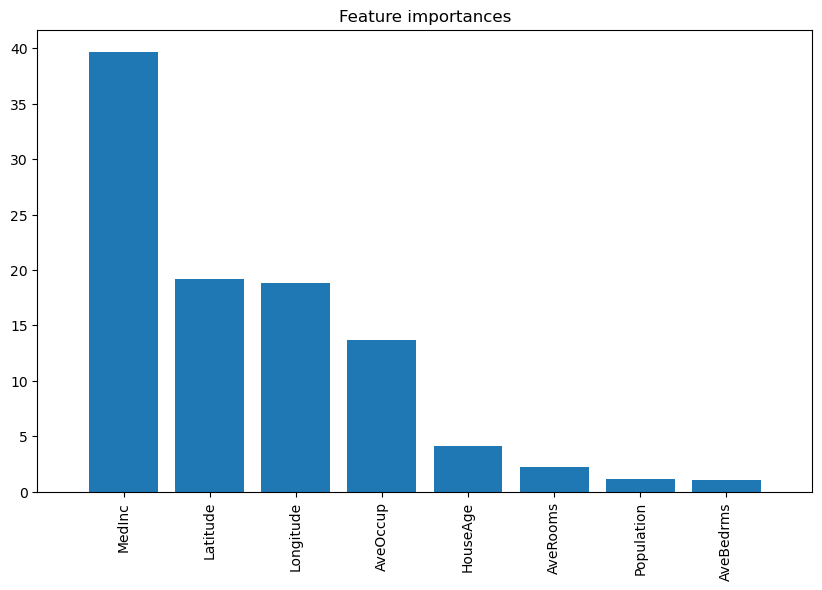

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=california.feature_names)
df['MedHouseVal'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = CatBoostRegressor(n_estimators=100, depth=5, random_state=42, verbose=0)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-Squared: {r2:.4f}")

# Feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = california.feature_names

print("Feature importances:")
for f in range(X.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


Best Hyperparameters: {'depth': 7, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.2}
Mean Squared Error: 0.1976
R-Squared: 0.8492
Feature importances:
MedInc: 32.1071
Longitude: 21.1427
Latitude: 19.5442
AveOccup: 14.1455
HouseAge: 5.2173
AveRooms: 3.8575
AveBedrms: 2.0156
Population: 1.9699


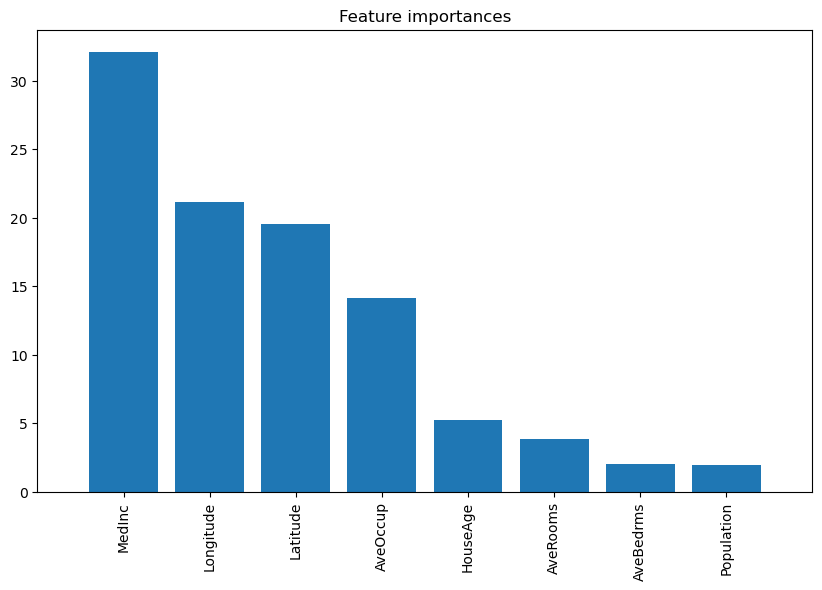

In [13]:
# CatBoost Regression with California Housing Dataset and Cross-Validation for Hyperparameter Tuning

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Convert to DataFrame for better readability (optional)
df = pd.DataFrame(X, columns=california.feature_names)
df['MedHouseVal'] = y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
model = CatBoostRegressor(random_state=42, silent=True)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5]
}

# Set up GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Train the best model on the full training set
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-Squared: {r2:.4f}")

# Feature importances
importances = best_model.get_feature_importance()
indices = np.argsort(importances)[::-1]
features = california.feature_names

print("Feature importances:")
for f in range(X.shape[1]):
    print(f"{features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
